In [6]:
import numpy as np
import matplotlib.pyplot as plt


In [13]:
# Given matrices of 1s and 0s, row is number of observations
# column is the number of variables , implement a function that calculates MI

def MIscorePart(X,Y,xlabel, ylabel):
  assert X.shape==Y.shape, "Shape of the two input matrices must be the same"
  nrow=X.shape[0]
  rightX=X==xlabel
  rightY=Y==ylabel
  margX=(np.sum(rightX, axis=0)+10**-10)/nrow
  margY=(np.sum(rightY, axis=0)+10**-10)/nrow
  
  inter=(np.sum(np.logical_and(rightX, rightY), axis=0)+10**-10)/nrow
  #print(margX, margY, inter)
  #print(inter*np.log(margX*margY))
  result=inter*np.log(inter/(margX*margY))
  return result
  


def MIscore(X,Y):
  assert X.shape==Y.shape, "Shape of the two input matrices must be the same"
  nrow=X.shape[0]
  part1=MIscorePart(X,Y,1,1) #x=1, y=1 
  part2=MIscorePart(X,Y,1,0)
  part3=MIscorePart(X,Y,0,1)
  part4=MIscorePart(X,Y,0,0)
  
  score=part1+part2+part3+part4
  return score

In [38]:
from sklearn.metrics import mutual_info_score
def compareMI(X,Y):
  scikitMI=mutual_info_score(X,Y)
  myMI=MIscore(X,Y)
  print(scikitMI-myMI)
  return scikitMI-myMI

In [36]:
testx=np.random.randint(0,2,10000)
testy=np.random.randint(0,2,10000)

result=compareMI(testx, testy)
print(result)

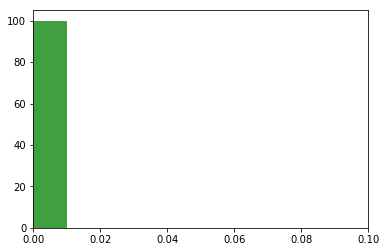

In [31]:
plotHist(compareMI(testx, testy), 100)